# Macierze - uzupełnienie

* tworzenie macierzy i indeksowanie elementów macierzy
* operacje macierzowe i funkcje działające na macierzach
* macierze logiczne i operacje na macierzach logicznych
* optymalizacja kodu
 * wektoryzacja - zamiana pętli po elementach na mechanizmy indeksowania
 * prealokacja - dynamiczne modyfikowanie rozmiarów macierzy jest kosztowne



## Operacje na macierzach

TODO zebrac operatory

* operacje skalarne na elementach macierzy:  `+`, `-`, `*`, `/`, `.^`, `.\`

* operacje macierzowe: `*`, `/`, `\`
 * `A * B` iloczyn macierzy (iloczyn skalarny dla wektorów) 
 * `A / B` dzielenie macierzy, wynikiem jest `X` takie, że `X * B = A`
 * `A \ B`  dzielenie macierzy, wynikiem jest `X` takie, że `A * X = B`
 * potęgowanie `A^n` tylko dla macierzy `A` kwadratowych

* opearcje macierzowe element po elemencie: `+`, `-`, `.*`, `./`, `.^`, `.\`
* wymiary macierzy muszą się zgadzać

* operacje macierzy i wektora element po elemencie powielane wzdłuż pasującego wymiaru

## Funkcje macierzowe

* zeros()
* inv()
itd

## Macierze i funkcje

Wiele funkcji Matlaba jest przystosowana do działania na macierzach o dowolnych kształtach


In [ ]:
w = 1:6
X = reshape(w, 2, 3)

a = sin(w)
b = cos(X)

**Ćwiczenie** popraw program `pole_kola.m` tak aby funkcja zwracała poprawny wynik dla argumentu macierzowego. Wynikiem funkcji będzie macierz zawierająca w każdym z elementów  $P_{ij}$ wartość pola dla promienia $R_{ij}$.
Postaraj się nie korzystać z instrukcji pętli. 

**Ćwiczenie** zmierz czas wykonywania poniższych instrukcji.
* porównaj szybkość działania przy zastosowaniu prealokowanego wektora `x`
* przyśpiesz działanie stosując wektoryzację (pozbądź się instrukcji pętli)

In [ ]:
n=100000
tic
for i=1:n
    x(i) = sqrt(i);
end
toc
sum(x)

## Wektory i macierze logiczne

* macierze zawierające wartości logiczne (typ `logical`), wartość `0` to fałsz, wartość `1` (lub niezerowa) to prawda
* indeksowanie macierzy za pomocą macierzy logicznych
* funkcje `false()` i `true()` pozwalają tworzyć macierze logiczne
* funkcja `logical()` zamienia macierz liczbową na logiczną

In [85]:
X = [1 , -5, 7 ; -1, 42, -12]
ind = X < 0
whos ind

X =

    1   -5    7
   -1   42  -12

ind =

  0  1  0
  1  0  1

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        ind         2x3                          6  logical

Total is 6 elements using 6 bytes



In [84]:
# indeksowanie macierzą logiczną
a = X(ind)    
b = X( X > 0 )
X( X > 0) = 111

a =

   -1
   -5
  -12

b =

    1
   42
    7

X =

   111    -5   111
    -1   111   -12



In [ ]:
A = true(2)
B = false(2, 3)
whos A B

In [ ]:
# wartości logiczne mogą być traktowane jak liczby całkowite
C = A + 1
whos A C

**Ćwiczenie** dlaczego poniższe wyrażenie nie działa? Spróbuj to naprawić.

In [ ]:
w = 1:5;
w([1 0 1 0 1]) = -1

## Przydatne funkcje operujące na wartościach logicznych

* `any()` zwraca 1 gdy wektor posiada niezerowy element,  
dla macierzy zwraca wektor z wartością 1 gdy w kolumnie jest niezerowa wartość   
* `all()` zwraca 1 dla każdej kolumny której wszystkie elementy są niezerowe
* `find()` zwraca indeksy (indeksowanie liniowe) niezerowych elementów
* `isequal()` sprawdza czy macierze mają jednakowe elementy


In [ ]:
w1 = [ 0 0 1 2 ];
w2 = zeros(1,10);

a = all(w1)
b = any(w1)

c = all(w2)
d = any(w2)

In [ ]:
E = [ 1 2 ; 0 0 ; 3 * eye(2)]'
all(E)
any(E)

In [ ]:
# indeksy liniowe
k = find(E)
a = E(k)

In [ ]:
# indeksy wierszy i kolumn
[w k] = find(E)

In [ ]:
# szukanie zerowych elementów
k2 = find(~E)

In [ ]:
# szukanie elementów spełniających warunki
k3 = find(E > 2)

In [ ]:
X = E
isequal(E, X)

% to samo za pomocą funkcji all()
all(all(X == E))   

X(1,1) = -X(1,1)
isequal(E, X)
all(all(X == E))   


## Operatory logiczne

* operatory logiczne działające element po elemencie: `&` and, `|` or, `~` not

In [ ]:
X = magic(5)
X(X > 5 & X < 10)


**Ćwiczenie** utwórz macierz `X` o wymiarach 10x10 posiadającą losowe wartości z zakresu od -1 do 1. 
Następnie zastąp wszystkie elementy o wartości ujemnej w macierzy `X` liczbą `0`.

## Zadanie 6 Regresja liniowa

Napisz funkcję o nazwie `regresja`, która dla danych werktowów $x$ i $y$ zwróci współczynniki $a$ i $b$ okreslające linię prostą $y = a x + b$ dopasowaną do danych $x$ i $y$ za pomocą metody najmniejszych kwadratów. 

Dla danych $x_i$ i $y_i$ wspólczyniki $a$ i $b$ wyznacz ze wzoru:

$$
a=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}
$$

$$
b=\bar{y}-a \bar{x}
$$
gdzie $\bar{x}$ i $\bar{y}$ to wartości średnie zmiennych.

Argumentami funkcji są dwa werktory $x$ i $y$. Jeżeli rozmiary wektorów nie zgadzają się, funkcja zwraca stosowany komunikat błedu oraz przerywa swoje działanie. Jeżeli użytkownik poda za mało lub za dużo argumentów, wówczas funkcja również zwraca odpowiedni komunikat z błędem i konczy swoje działanie. Do wypisania komunikatów z będęm wykorzystaj funkcję `error()`.

Przykład działania funkcji:


a =  1.8724
b = -9.3481


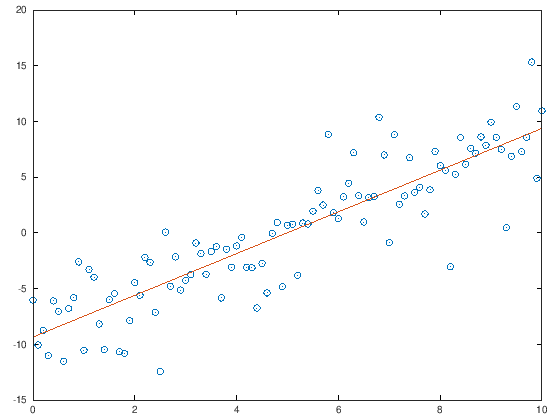

In [2]:
x = 0:.1:10;
y = 2 * x - 10;

% dodajemy troche szumu
y = y + 3*randn(size(x));

[a b] = regresja(x, y)

plot(x, y, 'o');
hold on
plot(x, a*x+b);
 